In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import warnings
from collections import Counter
import csv

In [3]:
# 한국어 글자 깨짐 없애기
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
## 지난 1년 카드 내역(전체)
jul = pd.read_csv('/content/drive/My Drive/data/(2019년)7월 사용내역.csv',encoding='cp949')
aug = pd.read_csv('/content/drive/My Drive/data/(2019년)8월 사용내역.csv',encoding='cp949')
sep = pd.read_csv('/content/drive/My Drive/data/(2019년)9월 사용내역.csv',encoding='cp949')
oct = pd.read_csv('/content/drive/My Drive/data/(2019년)10월 사용내역.csv',encoding='cp949')
nov = pd.read_csv('/content/drive/My Drive/data/(2019년)11월 사용내역.csv',encoding='cp949')
dec = pd.read_csv('/content/drive/My Drive/data/(2019년)12월 사용내역.csv',encoding='cp949')
jan = pd.read_csv('/content/drive/My Drive/data/(2020년)1월 사용내역.csv',encoding='cp949')
fab = pd.read_csv('/content/drive/My Drive/data/(2020년)2월 사용내역.csv',encoding='cp949')
mar = pd.read_csv('/content/drive/My Drive/data/(2020년)3월 사용내역.csv',encoding='cp949')
april = pd.read_csv('/content/drive/My Drive/data/(2020년)4월 사용내역.csv',encoding='cp949')
may = pd.read_csv('/content/drive/My Drive/data/(2020년)5월 사용내역.csv',encoding='cp949')
jun = pd.read_csv('/content/drive/My Drive/data/(2020년)6월 사용내역.csv',encoding='cp949')

testD = pd.read_csv('/content/drive/My Drive/data/(2020년)7월 사용내역.csv',encoding='cp949')
jun.head()

,날짜,결제 장소,결제 금액,업종,분류,카드사,카드 종류
0,20200601,위메프,9500,전자상거래PG,쇼핑,국민은행,the easy 카드
1,20200602,해밥상달빛주막,73000,한식,음식점,국민은행,the easy 카드
2,20200603,씨유제천터미널점,3800,편의점,편의점,카카오뱅크,프렌즈 체크카드
3,20200603,외갓집,2000,기타식품,음식점,신한은행,s20 체크카드
4,20200603,씨유제천터미널점,1200,편의점,편의점,국민은행,the easy 카드


In [5]:
# 최근 3개월 데이터 합치기
mon3 = pd.concat([april, may, jun])
mon3.index=range(0,len(mon3)) # index 재설정
# 1년 데이터 합치기
data=[[jul],[aug],[sep],[oct],[nov],[dec],[jan],[fab],[mar],[april], [may], [jun]]

In [6]:
# 데이터 탐색
print("카테고리(분류):")
mon3['분류'].unique()

카테고리(분류):


array(['음식점', '카페/베이커리', '병원/약국', '쇼핑', '편의점', '마트', '교통', '주점', '기타',
       '라이프', '스포츠'], dtype=object)

In [7]:
print("현재 사용하는 카드 종류:")
warnings.filterwarnings(action='ignore') # 경고 메시지 무시하기
mon3['카드 종류'].unique() # 데이터 오류 발견
mon3['카드 종류'].loc[mon3['카드 종류'] == '프렌즈 체크카드 '] = '프렌즈 체크카드'
mon3['카드 종류'].unique()

현재 사용하는 카드 종류:


array(['프렌즈 체크카드', 's20 체크카드', 'the easy 카드'], dtype=object)

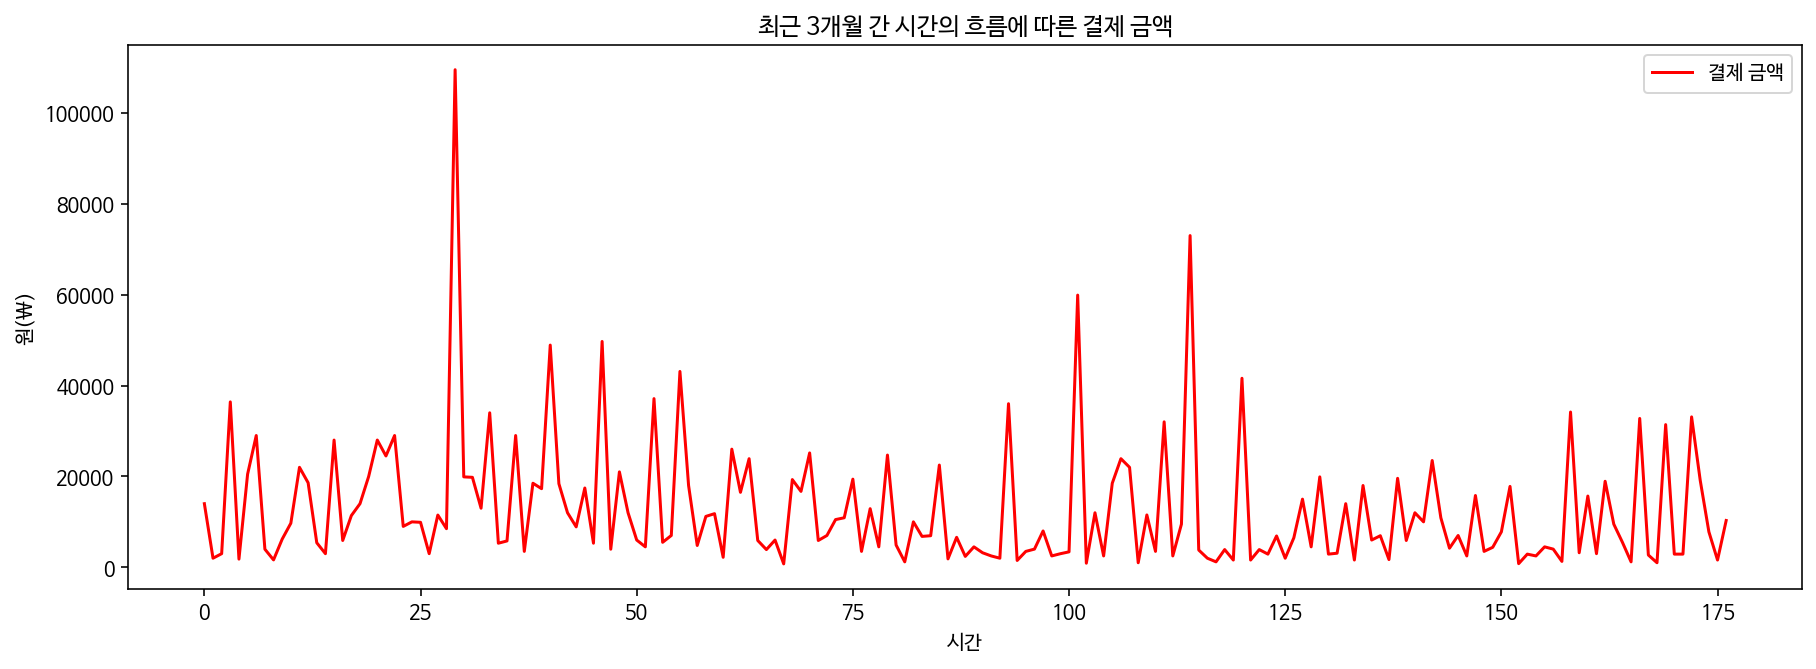


최근 1개월 간 쓴 가장 큰 금액 = 109500원

          날짜      결제 장소   결제 금액      업종  분류   카드사     카드 종류
29  20200419  (주)원신더블유몰  109500  대형쇼핑센터  쇼핑  신한은행  s20 체크카드



In [8]:
%matplotlib inline
plt.figure(figsize=(15, 5)) # 그래프 사이즈 지정
mon3['결제 금액'].plot(color='#ff0000')
plt.legend()
plt.title("최근 3개월 간 시간의 흐름에 따른 결제 금액")
plt.xlabel("시간")

plt.ylabel("원(\)")
plt.show()

print("") 
print("최근 1개월 간 쓴 가장 큰 금액 = "+str(mon3['결제 금액'].max())+"원")
print("") 
print(mon3[mon3['결제 금액'] == mon3['결제 금액'].max()])
print("")


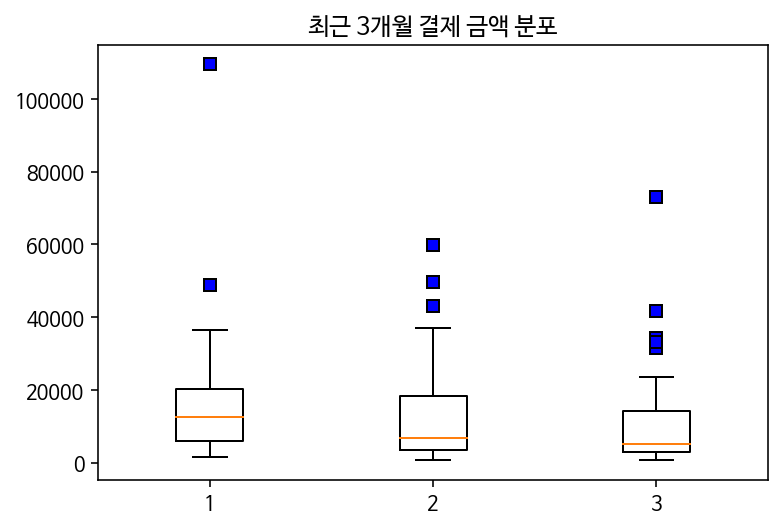

count       64.00000
mean     10182.34375
std      12399.74702
min        800.00000
25%       2900.00000
50%       5000.00000
75%      14250.00000
max      73000.00000
Name: 결제 금액, dtype: float64

In [9]:
green_diamond = dict(markerfacecolor='b', marker='s')
plt.boxplot([april['결제 금액'],may['결제 금액'],jun['결제 금액']], flierprops=green_diamond)
plt.title("최근 3개월 결제 금액 분포")

plt.show()

# 결제 금액 분포 살펴보기
s = pd.Series(jun['결제 금액'])
s.describe()

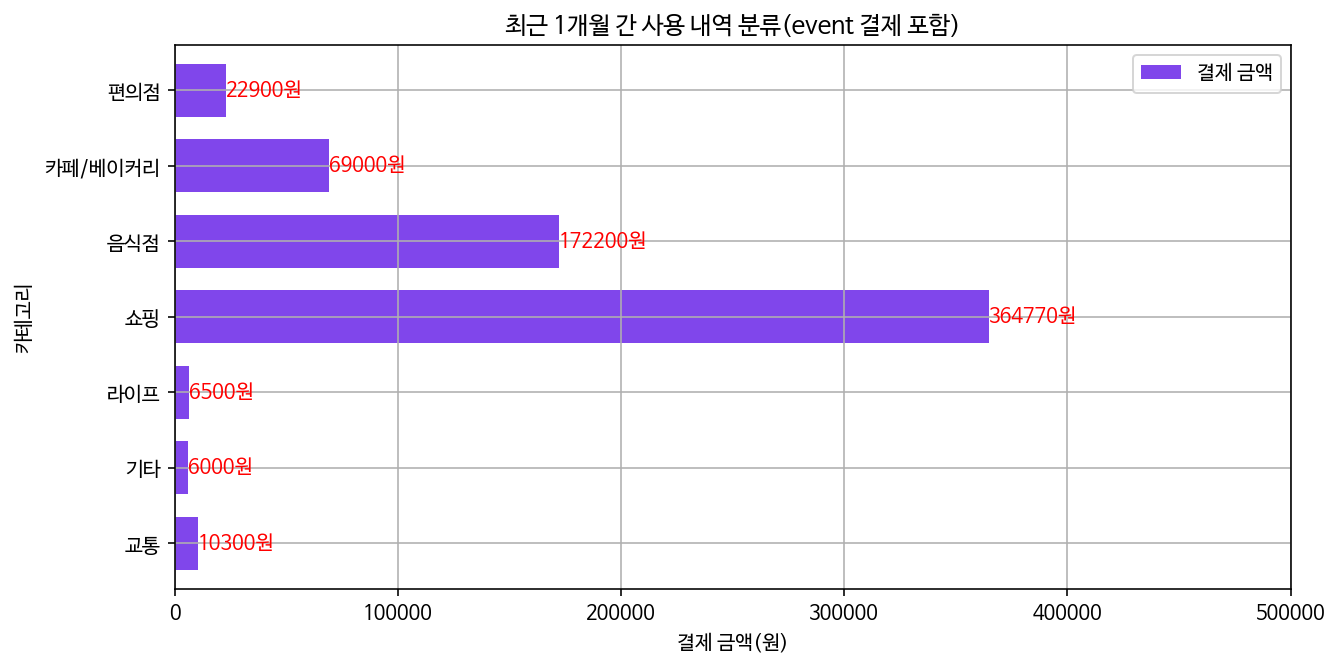

In [10]:
plt.figure(figsize=(10,5))  
d = jun['결제 금액'].groupby(jun['분류'])
d.sum().plot.barh(color='#8046eb', rot=0, width=0.7)
plt.grid()
plt.legend()
plt.title("최근 1개월 간 사용 내역 분류(event 소비 포함)")
plt.ylabel("카테고리")
plt.xlabel("결제 금액(원)")
plt.xlim(0,500000)

for x, y in enumerate( list(d.sum()) ):
    txt = "%d원" % y
    plt.text(y, x, txt, fontsize=10, color='#ff0000', 
                    horizontalalignment='left', verticalalignment='center')
plt.show()

In [11]:
# event성 소비 전처리: 2IQR(극단치)를 event성 소비로 간주 -> 제거 
## 예) 자동차 구매, 여행 등

def detect_extremes(df, n, features): 
    outlier_indices = [] 
    
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 

        outlier_step = 2 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        
        outlier_indices.extend(outlier_list_col) 
    
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    
    return multiple_outliers 

Outliers_to_drop=[]
for i in range(0,12):  
    Outliers_to_drop.append(detect_extremes(data[i][0], 0, ["결제 금액"]))
    for j in range(0,len(Outliers_to_drop[i])):
        #print(data[i][0].loc[Outliers_to_drop[i][j]]) # 이상치 값 확인
    
        data[i][0] = data[i][0].drop(Outliers_to_drop[i][j], axis = 0).reset_index(drop=True) # 삭제


In [12]:
mon3_fin = pd.concat([data[-3][0], data[-2][0], data[-1][0]])
mon3_fin.index=range(0,len(mon3_fin)) # index 재설정

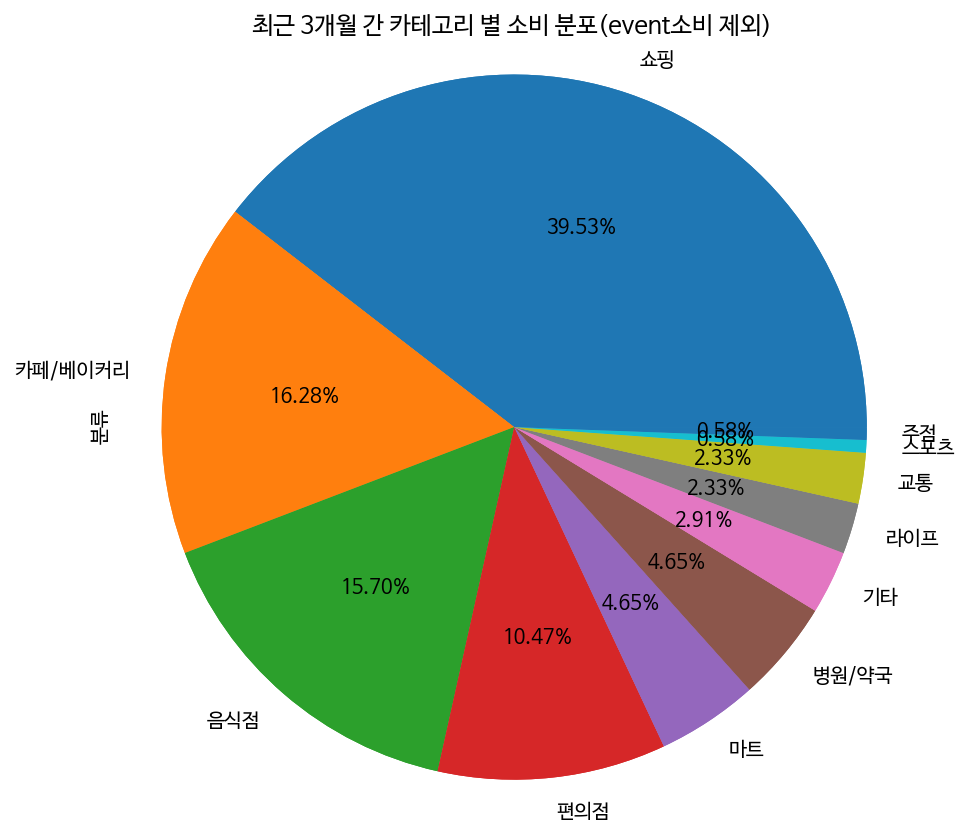

In [13]:
plt.figure(figsize=(7,7))  
plt.pie(mon3_fin['분류'].value_counts())
mon3_fin['분류'].value_counts().plot.pie(autopct='%.2f%%')
plt.title("최근 3개월 간 카테고리 별 소비 분포(event소비 제외)")
plt.axis('equal')
plt.show()

In [14]:
# 1년 event성 소비를 제외(전처리)한 월별 총 소비 금액 data csv 파일로 내보내기
consumeD = []
for i in range(0,12):
    consumeD.append(str(data[i][0]['결제 금액'].sum()))

f = open('output.csv', 'w', encoding='utf-8')
wr = csv.writer(f)

for i in range(0,12):
    wr.writerow(consumeD[i])

f.close()

In [15]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [16]:
if tf.__version__ != '1.15.0':
    !pip uninstall tensorflow
    !pip install tensorflow==1.15.0

In [17]:
import tensorflow as tf

In [18]:
##지난 1년 한달 카드사용 총 금액(전처리 완료)과 외부요인 데이터 불러오기
card = pd.read_csv('/content/drive/My Drive/data/카드경제지표.csv',encoding='utf-8')
card

,년,월,총 사용 금액,GDP,물가상승,인플레이션,경제지수
0,2019년,7월,875380,0.4,0.6,-0.3,99.9
1,2019년,8월,867430,0.0,0.0,0.2,99.9
2,2019년,9월,674360,0.0,-0.4,0.4,100.3
3,2019년,10월,680530,1.3,0.0,0.2,100.1
4,2019년,11월,876540,0.0,0.2,-0.6,100.3
5,2019년,12월,908650,0.0,0.7,0.2,100.3
6,2020년,1월,784030,-1.3,1.5,0.6,100.9
7,2020년,2월,803180,0.0,1.1,0.0,100.5
8,2020년,3월,695320,0.0,1.0,-0.2,97.7
9,2020년,4월,666920,-3.3,0.1,-0.6,97.7


In [19]:
## 데이터 무결성 확인
data[11][0]["결제 금액"].sum() == card[(card['월'] == '6월')]['총 사용 금액']

11    True
Name: 총 사용 금액, dtype: bool

In [20]:

def data_change(x):
  x_data=[]

  for i in range(len(x[:])):

    if(i==0):
      init=100+100*x[i]/100
      x_data.append([init[0]])
      
    else:
      init=init+init*x[i]/100
      x_data.append([init[0]])
    
  return x_data

In [21]:
card_np=card.values
x=card_np[:,range(2,6)]

price=card_np[:,[2]]
x_1=data_change(x[:,[1]])
x_2=data_change(x[:,[2]])

x = np.concatenate((x,x_1,x_2), axis=1) 
x = x[:,[0,3,4,5]] # 증감률 -> 점수화 data로 바꾸기

m=[]#month
for i in range(0,12):
    if i<6:
        m.append(i+7)
    if i>5:
        m.append(i-5)
m=np.array(m).reshape(-1,1)
ind=np.array(range(0,12)).reshape(-1,1)
x=np.concatenate((m,x),axis=1)
x

array([[7, 875380, -0.3, 100.4, 100.6],
       [8, 867430, 0.2, 100.4, 100.6],
       [9, 674360, 0.4, 100.4, 100.1976],
       [10, 680530, 0.2, 101.7052, 100.1976],
       [11, 876540, -0.6, 101.7052, 100.3979952],
       [12, 908650, 0.2, 101.7052, 101.1007811664],
       [1, 784030, 0.6, 100.3830324, 102.617292883896],
       [2, 803180, 0.0, 100.3830324, 103.74608310561885],
       [3, 695320, -0.2, 100.3830324, 104.78354393667504],
       [4, 666920, -0.6, 97.0703923308, 104.88832748061172],
       [5, 758240, -0.2, 97.0703923308, 104.88832748061172],
       [6, 577070, 0.2, 97.0703923308, 105.20299246305356]], dtype=object)

In [22]:
a=x[:,[1]].reshape(1,-1).argsort()
rank=x[a,0]

rank

array([[6, 4, 9, 10, 3, 5, 1, 2, 8, 7, 11, 12]], dtype=object)

In [23]:
rank=rank[0].tolist()
rank=pd.DataFrame(rank)
rank.columns=['month']
rank['ss']=range(1,13)
rank

,month,ss
0,6,1
1,4,2
2,9,3
3,10,4
4,3,5
5,5,6
6,1,7
7,2,8
8,8,9
9,7,10


In [24]:
x=pd.DataFrame(x)
x.columns=['month','mean3m','GDP','물가상승','경제지수']
x

,month,mean3m,GDP,물가상승,경제지수
0,7,875380,-0.3,100.4,100.6
1,8,867430,0.2,100.4,100.6
2,9,674360,0.4,100.4,100.198
3,10,680530,0.2,101.705,100.198
4,11,876540,-0.6,101.705,100.398
5,12,908650,0.2,101.705,101.101
6,1,784030,0.6,100.383,102.617
7,2,803180,0,100.383,103.746
8,3,695320,-0.2,100.383,104.784
9,4,666920,-0.6,97.0704,104.888


In [25]:
x_mon=pd.merge(x, rank,on='month')
#print(x_mon)
x_mon=x_mon.drop(['month'],axis=1)
x_mon

   month  mean3m  GDP     물가상승     경제지수  ss
0      7  875380 -0.3    100.4    100.6  10
1      8  867430  0.2    100.4    100.6   9
2      9  674360  0.4    100.4  100.198   3
3     10  680530  0.2  101.705  100.198   4
4     11  876540 -0.6  101.705  100.398  11
5     12  908650  0.2  101.705  101.101  12
6      1  784030  0.6  100.383  102.617   7
7      2  803180    0  100.383  103.746   8
8      3  695320 -0.2  100.383  104.784   5
9      4  666920 -0.6  97.0704  104.888   2
10     5  758240 -0.2  97.0704  104.888   6
11     6  577070  0.2  97.0704  105.203   1


,mean3m,GDP,물가상승,경제지수,ss
0,875380,-0.3,100.4,100.6,10
1,867430,0.2,100.4,100.6,9
2,674360,0.4,100.4,100.198,3
3,680530,0.2,101.705,100.198,4
4,876540,-0.6,101.705,100.398,11
5,908650,0.2,101.705,101.101,12
6,784030,0.6,100.383,102.617,7
7,803180,0,100.383,103.746,8
8,695320,-0.2,100.383,104.784,5
9,666920,-0.6,97.0704,104.888,2


In [26]:
x=np.array(x_mon.values.tolist(),dtype=object)
x

array([[875380, -0.3, 100.4, 100.6, 10],
       [867430, 0.2, 100.4, 100.6, 9],
       [674360, 0.4, 100.4, 100.1976, 3],
       [680530, 0.2, 101.7052, 100.1976, 4],
       [876540, -0.6, 101.7052, 100.3979952, 11],
       [908650, 0.2, 101.7052, 101.1007811664, 12],
       [784030, 0.6, 100.3830324, 102.617292883896, 7],
       [803180, 0.0, 100.3830324, 103.74608310561885, 8],
       [695320, -0.2, 100.3830324, 104.78354393667504, 5],
       [666920, -0.6, 97.0703923308, 104.88832748061172, 2],
       [758240, -0.2, 97.0703923308, 104.88832748061172, 6],
       [577070, 0.2, 97.0703923308, 105.20299246305356, 1]], dtype=object)

In [27]:
y=card_np[:,[2]]
y

array([[875380],
       [867430],
       [674360],
       [680530],
       [876540],
       [908650],
       [784030],
       [803180],
       [695320],
       [666920],
       [758240],
       [577070]], dtype=object)

[0.8996622232945293 0.25 0.7183917665724227 0.080393296423856
 0.8181818181818182]
--
[0.8996622232945293]
--
[[0.8996622232945293 0.25 0.7183917665724227 0.080393296423856
  0.8181818181818182]
 [0.8756861089329875 0.6666666666666667 0.7183917665724227
  0.080393296423856 0.7272727272727273]
 [0.2934133542433199 0.8333333333333334 0.7183917665724227 0.0
  0.18181818181818182]] -> [0.3120212316786296]
 -- 
X:  Tensor("Placeholder:0", shape=(?, 3, 5), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed the

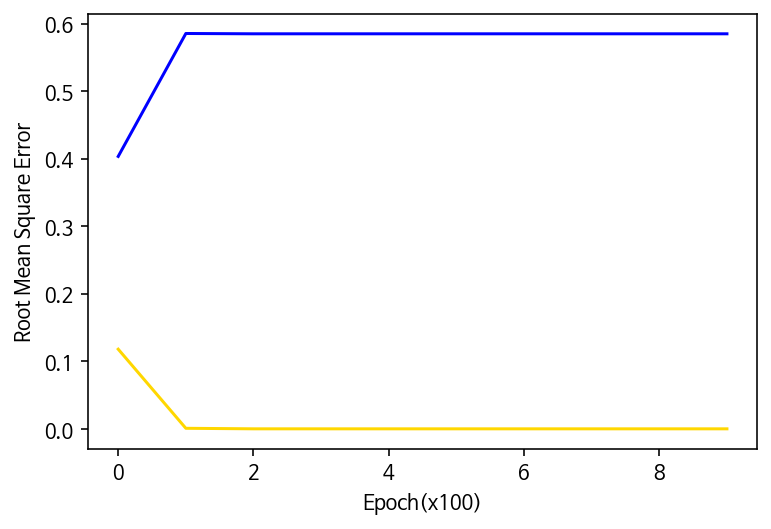

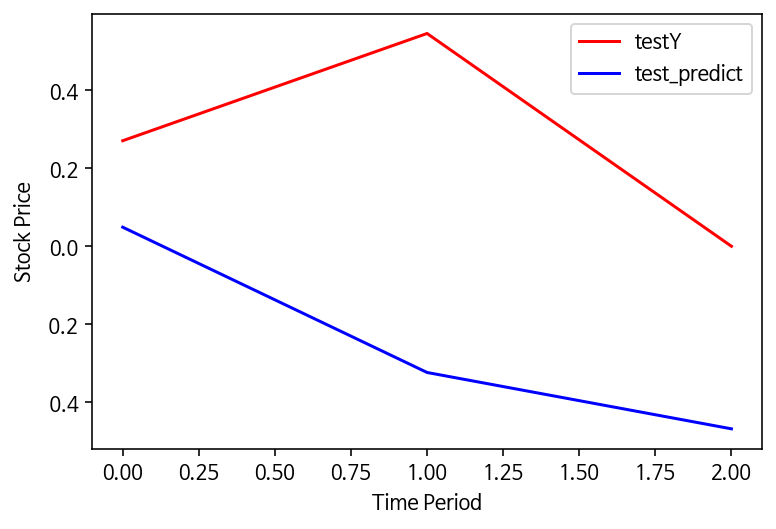

In [28]:
# 랜덤에 의해 똑같은 결과를 재현하도록 시드 설정
# 하이퍼파라미터를 튜닝하기 위한 용도(흔들리면 무엇때문에 좋아졌는지 알기 어려움)
tf.set_random_seed(777)

# 하이퍼파라미터
input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수

seq_length=3           # 1개의 시퀀스의 길이(시게열데이터 입력 개수)
rnn_cell_hidden_dim=8 # 각 셀의 출력 크기
forget_bias=1.0        # 망각편향(기본값 1.0)
num_stacked_layers=1   # LSTM 개수
keep_prob=1.0          # dropout할 때 keep할 비율

epoch_num=1000     # 에폭 횟수(학습용 전체 데이터를 몇 회 반복해서 학습할 것인가 입력))
learning_rate=0.01

def MinMaxScaler(data):
  #데이터 모든 숫자들의 최소 값만큼 뺀다.
  numerator=data-np.min(data,0)
  #최대값과 최소 값의 차이를 구한다.
  denominator=np.max(data,0)-np.min(data,0)
  result=numerator/(denominator)
  return result


# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

def reverse_data_standardization(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return ((x_np * org_x_np.std()) + org_x_np.mean())

# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()


#card=pd.read_csv('/content/drive/My Drive/카드경제지표.csv', encoding='UTF-8')
#card_np=card.values

price=card_np[:,[1]]

x=MinMaxScaler(x)
y=MinMaxScaler(y)


print(x[0])
print('--')
print(y[0])
print('--')

dataX=[]
dataY=[]

for i in range(0, len(y)-seq_length):
  _x=x[i:i+seq_length]
  _y=y[i+seq_length]    #다음 달 소비 예측

  if i is 0:
    print(_x, "->", _y)
    print(" -- ")

  dataX.append(_x)
  dataY.append(_y)

# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)
 
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)

# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

import datetime

# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(1000):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)

# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r', label='testY')
plt.plot(test_predict, 'b', label='test_predict')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()

In [34]:
#최근 3개월 데이터 평균 구하기
train_X=[]
for i in range(0,10):
    A=x_mon[i:i+3].mean(axis=0)
    train_X.append(A.tolist())


test_X=train_X[-1]
train_X=train_X[:-1]
#print(train_X)
train_Y=x_mon[3:]['mean3m']
#print(train_Y)
Outliers_to_drop_=detect_extremes(testD, 0, ["결제 금액"])
testD = testD.drop(Outliers_to_drop_, axis = 0).reset_index(drop=True)
test_Y=testD['결제 금액'].sum()

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_Y)
test_X=np.array(test_X).reshape(1,-1)

pred_y = model.predict(test_X)
display('실제 다음달 소비 예측값=',test_Y,'모델이 예측한 값=',pred_y[0])


'실제 다음달 소비 예측값='

545764

'모델이 예측한 값='

439445.96028901264

In [ ]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)

test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
print("test_predict", test_predict[0])
test_predict=reverse_data_standardization(price,test_predict)
print("test_predict(역정규화)", test_predict[0])
print("원래의 데이터: ",price[-1])
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib
import os
import csv
import matplotlib.pyplot as plt

# 랜덤에 의해 똑같은 결과를 재현하도록 시드 설정
# 하이퍼파라미터를 튜닝하기 위한 용도(흔들리면 무엇때문에 좋아졌는지 알기 어려움)
tf.set_random_seed(777)

# 하이퍼파라미터
input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수

seq_length=3           # 1개의 시퀀스의 길이(시게열데이터 입력 개수)
rnn_cell_hidden_dim=10 # 각 셀의 출력 크기
forget_bias=1.0        # 망각편향(기본값 1.0)
num_stacked_layers=1   # LSTM 개수
keep_prob=1.0          # dropout할 때 keep할 비율

epoch_num=1000     # 에폭 횟수(학습용 전체 데이터를 몇 회 반복해서 학습할 것인가 입력))
learning_rate=0.01


def data_change(x):
  x_data=[]

  for i in range(len(x[:])):

    if(i==0):
      init=100+100*x[i]/100
      x_data.append([init[0]])
      
    else:
      init=init+init*x[i]/100
      x_data.append([init[0]])
    
  return x_data


# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

def reverse_data_standardization(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return ((x_np * org_x_np.std()) + org_x_np.mean())

# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()


card=pd.read_csv('/content/drive/My Drive/카드경제지표.csv', encoding='UTF-8')
card_np=card.values
x=card_np[:,[1,2,3,4,5]]
y=card_np[:,[1]]
price=card_np[:,[1]]

#x=min_max_scaling(x)
#y=min_max_scaling(y)

x_1=data_change(x[:,[1]])
x_2=data_change(x[:,[2]])
x_3=data_change(x[:,[3]])
x_4=x[:,[4]]
x = np.concatenate((x,x_1,x_2,x_3,x_4), axis=1) 

x=x[:,[0,5,6,7,8]]